<h1>Introduction</h1>
This project gives some analysis on how the movie scores are affected by factors like budgets, genres, numbers of critics, directors and actors. This repot takes a close look at how these various factors can influence the movie scores.
The data can be found at:
https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

<h1>Hypotheses</h1>

Based on the dataset, I have the following hypotheses:

    1. The films performed by popular actors tends to have better reviews.
    2. The films by popular directors tends to have better reviews.
    3. Films with more critics tends to have worse reviews. 
    4. Films that has bigger budget will be more likely to rate higher.
    5. There are negative relationships between duration and reviews.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from collections import Counter
%matplotlib inline
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


 <h4>1. The films performed by popular actors tends to have better reviews. <h4>
 <h4>2. The films by popular directors tends to have better reviews. <h4>

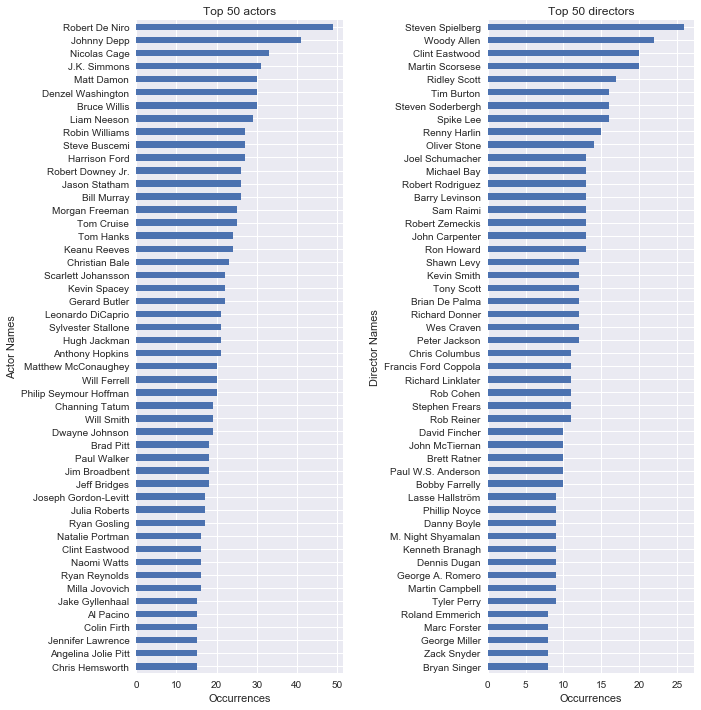

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)

actor_1_counts = Counter(df['actor_1_name'])
rank_result = pd.DataFrame.from_dict(actor_1_counts, orient='index')
num_items = 50  # show top #num_items rows 
rank_result.columns = ['count'] # set name to column for convenience
rank_result.sort_values('count',inplace=True, ascending=False)
actors_info = rank_result[0:num_items].copy()
actors_info.iloc[::-1].plot(kind='barh',figsize=(10, 12),ax=axes[0])
axes[0].set_xlabel('Occurrences')
axes[0].set_ylabel('Actor Names')
axes[0].set_title('Top ' + str(num_items) + ' actors')
axes[0].legend_.remove() # remove legend

actors_info['mean'] = pd.Series(np.zeros(num_items), index=actors_info.index)
for index, row in actors_info.iterrows():
    actors_info.set_value(index, 'mean', df.loc[df['actor_1_name'] ==index]['imdb_score'].mean())

director_counts = Counter(df['director_name'].dropna())
rank_result = pd.DataFrame.from_dict(director_counts, orient='index')
rank_result.columns = ['count'] # set name to column for convenience
rank_result.sort_values('count',inplace=True, ascending=False)
directors_info = rank_result[0:num_items].copy()
directors_info.iloc[::-1].plot(kind='barh',figsize=(10,12),ax=axes[1])
axes[1].set_xlabel('Occurrences')
axes[1].set_ylabel('Director Names')
axes[1].set_title('Top ' + str(num_items) + ' directors')
axes[1].legend_.remove() # remove legend
plt.subplots_adjust(wspace = 0.7) # set space between sub figures

directors_info['mean'] = pd.Series(np.zeros(num_items), index=directors_info.index)
for index, row in directors_info.iterrows():
    directors_info.set_value(index, 'mean', df.loc[df['director_name'] ==index]['imdb_score'].mean())
plt.show()

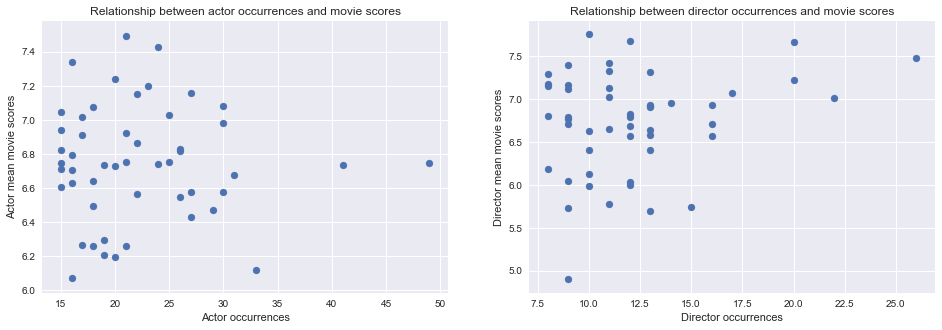

In [4]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.scatter(x = actors_info.iloc[:, [0]], y = actors_info.iloc[:, [1]])
plt.xlabel('Actor occurrences')
plt.ylabel('Actor mean movie scores')
plt.title('Relationship between actor occurrences and movie scores')

plt.subplot(1, 2, 2)
plt.scatter(x = directors_info.iloc[:, [0]], y = directors_info.iloc[:, [1]])
plt.xlabel('Director occurrences')
plt.ylabel('Director mean movie scores')
plt.title('Relationship between director occurrences and movie scores')
plt.show()


In this section, we are looking at the relationship between leading actors'/directors’' occurrences in the movie and the movie scores. In the first part, the subplots show the ranks of the leading actors'/directors' occurrences according to data. From the plots, we can see that Robert De Niro is the leading actor for 49 movies, followed by Johnny Depp. From the directors, we can see Steven Spielberg directs around 26 of the movies, followed by Woody Allen for 22 movies. Then we calculate the average movie score for each individual actor/director. The scattered plots show the distributions of the relationship. Each dot represents an individual with their occurrences and average movie score. We can conclude that the highest average scores of 7.5 and 7.4 is Leonardo DiCaprio and Tom Hanks, with occurrence 21 and 24 separately. The score for Robert De Niro and Johnny Depp are both 6.7. For the directors, there are 3 people average scored over 7.5. That are Martin Scorsese, Peter Jackson and David Fincher with occurrences of 20, 12 and 10 separately. Steven Spielberg scored 7.48 which is fairly good. Therefore, we can conclude that The most popular actors are not getting very good reviews however the most popular directors have fairly good movie scores.


<h4>3. Films with more critics tends to have worse reviews. <h4>

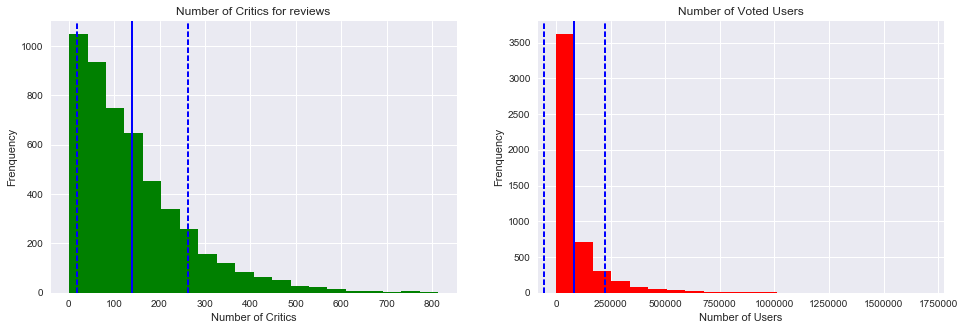

In [5]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.hist(df['num_critic_for_reviews'].dropna(), bins=20, color='green')
plt.axvline(df['num_critic_for_reviews'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean() + df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean()-df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Critics')
plt.ylabel('Frenquency')
plt.title('Number of Critics for reviews')

plt.subplot(1, 2, 2)
plt.hist(df['num_voted_users'].dropna(), bins=20, color='red')
plt.axvline(df['num_voted_users'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_voted_users'].mean() + df['num_voted_users'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_voted_users'].mean()-df['num_voted_users'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Users')
plt.ylabel('Frenquency')
plt.title('Number of Voted Users')
plt.show()

The histograms above show the distribution of the number of critics reviews and the number of users for the reviews. In this set of subplots, the solid line represents the population mean and the dashed lines represents one standard deviation to the left and right of the mean. Both of the histograms are positively skewed.


713.964590081 -15589.4410996 0.390554220012 0.0 12.6243712557


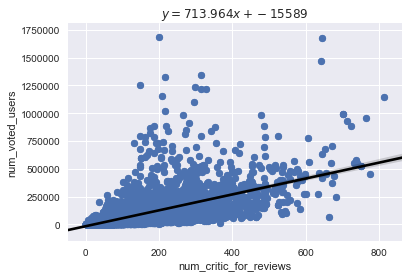

In [6]:
crit_numvoted = df[['num_critic_for_reviews', 'num_voted_users']].copy()
crit_numvoted = crit_numvoted[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_numvoted['num_critic_for_reviews'], y = crit_numvoted['num_voted_users'])
sns.regplot(x=crit_numvoted['num_critic_for_reviews'], y=crit_numvoted['num_voted_users'], line_kws = {'color' :'black'})
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x=crit_numvoted['num_critic_for_reviews'], y=crit_numvoted['num_voted_users'])
r_square = r_value**2
print(slope, intercept, r_square, p_value, slope_std_error)
plt.title('$y=%3.7sx+%3.7s$'%(slope, intercept))
plt.show()

From the above plot, we do see a positive relationship for the number of critics and number of voted users. The R-square value is 0.39, means 39% of the data is represented by this line. Thus the number of critics and the voted users are positively related.

0.00281572027277 6.04624954261 0.0932098358248 3.35330310902e-108 0.000124313487865


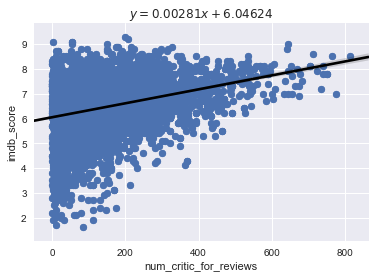

In [7]:
crit_imdb = df[['num_critic_for_reviews', 'imdb_score']].copy()
crit_imdb = crit_imdb[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_imdb['num_critic_for_reviews'], y = crit_imdb['imdb_score'])
sns.regplot(x=crit_imdb['num_critic_for_reviews'], y=crit_imdb['imdb_score'], line_kws = {'color' :'black'})
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x=crit_imdb['num_critic_for_reviews'], y=crit_imdb['imdb_score'])
r_square = r_value**2
print(slope, intercept, r_square, p_value, slope_std_error)
plt.title('$y=%3.7sx+%3.7s$'%(slope, intercept))
plt.show()

The following scattered plot shows the relationship between number of critics and the movie scores, we can see from the regression line that there is a slightly positive relationship, that means the more of the critics the slightly higher the movie scores, which is conflict to our hypothesis. However there the R-square value is only 0.093, which means only 9.3% of the value is explained by the regression line, thus further research should be conducted to see if there are any better models to explain the relationship. 

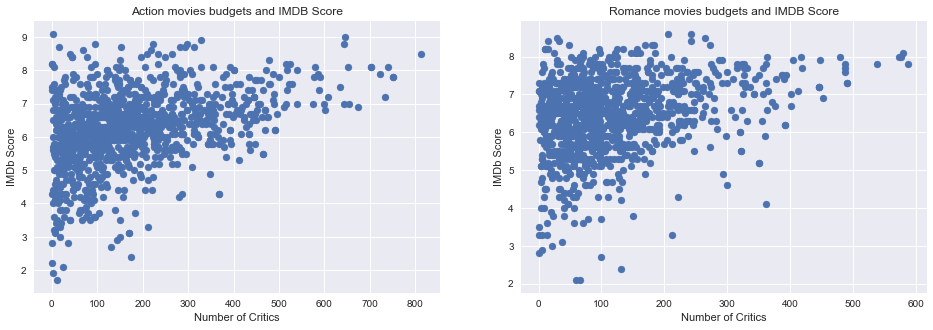

In [23]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
movie_type = 'Action'
act_crit = df[df['genres'].str.contains(movie_type)]
act_crit_imdb = act_crit[['num_critic_for_reviews', 'imdb_score']].copy()
act_crit_imdb = act_crit_imdb[np.isfinite(act_crit['num_critic_for_reviews'])]
plt.scatter(x = act_crit_imdb['num_critic_for_reviews'], y = act_crit_imdb['imdb_score'])
plt.xlabel('Number of Critics')
plt.ylabel('IMDb Score')
plt.title(movie_type +' movies budgets and IMDB Score')

plt.subplot(1, 2, 2)
movie_type = 'Romance'
act_crit = df[df['genres'].str.contains(movie_type)]
act_crit_imdb = act_crit[['num_critic_for_reviews', 'imdb_score']].copy()
act_crit_imdb = act_crit_imdb[np.isfinite(act_crit['num_critic_for_reviews'])]
plt.scatter(x = act_crit_imdb['num_critic_for_reviews'], y = act_crit_imdb['imdb_score'])
plt.xlabel('Number of Critics')
plt.ylabel('IMDb Score')
plt.title(movie_type +' movies budgets and IMDB Score')

plt.show()

In the last part of the graphs, we are looking at the patterns from difference genres. Here we take action and romance movie as an example, but the patterns of these two graphs are similar, thus we believe that the patterns are not affected by movie types. From the graphs we can conclude that these two columns have similar patterns.


 <h4>4. Films that has bigger budget will be more likely to rate higher. <h4>

20000000.0 12215500000.0


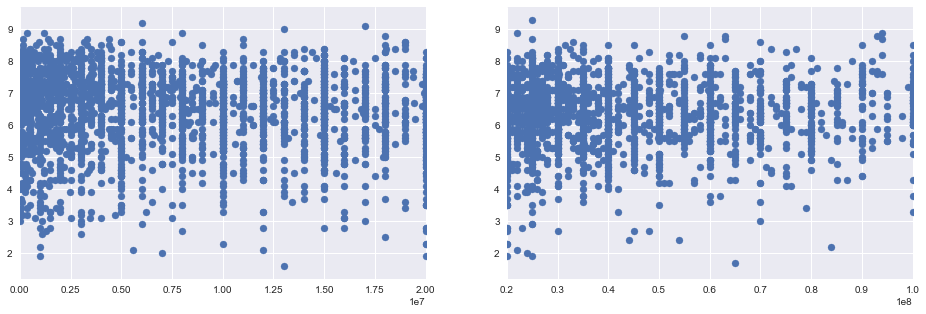

In [9]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
print(df['budget'].median(),df['budget'].max())
plt.xlim(0, 20000000)


plt.subplot(1, 2, 2)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
plt.xlim(20000000, 100000000)
plt.show()

Above subplots shows the relationship between the movie budgets and movie scores. The left one shows the smaller budget movies below 20 million dollars and the right plot shows the bigger budget above 20 million dollars. By comparing these two graphs, we cannot see a significant trend that the bigger budget movies will have higher movie scores.


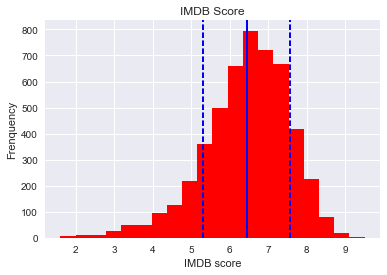

In [10]:
plt.hist(df['imdb_score'].dropna(), bins=20, color='red')
plt.axvline(df['imdb_score'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['imdb_score'].mean() + df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['imdb_score'].mean()-df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.xlabel('IMDB score')
plt.ylabel('Frenquency')
plt.title('IMDB Score')

This chart shows the distribution of the movie scores, we can see that it generally shows a negative skewness and the distribution is normal. We also see that most movies are scored from 6 to 7, the tail for lower scores is higher than the higher scores.


<h4>5. There are negative relationships between duration and reviews.<h4>

0.0116664523193 5.19208443411 0.0684667515598 1.68997291537e-79 0.000606997478494


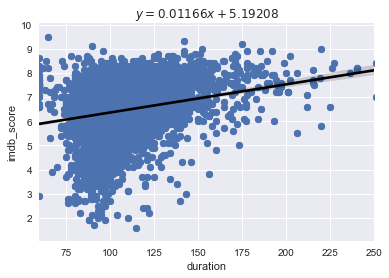

In [11]:
dur_score = df[['duration', 'imdb_score']].copy()
dur_score = dur_score[np.isfinite(df['duration'])]
plt.scatter(x = dur_score['duration'], y = dur_score['imdb_score'])
plt.xlim(60, 250)
sns.regplot(x=dur_score['duration'], y=dur_score['imdb_score'], line_kws = {'color' :'black'})
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x=dur_score['duration'], y=dur_score['imdb_score'])
r_square = r_value**2
print(slope, intercept, r_square, p_value, slope_std_error)
plt.title('$y=%3.7sx+%3.7s$'%(slope, intercept))
plt.show()

The graph above shows the relationship between movie duration and scores. We can see they are positively correlated. The slope is only 0.01, thus the change of movie scores will be slightly affected by duration. Only 6.8% of the data can be explained by the linear regression model, further research should be conducted to explore better ways of explanation the data.


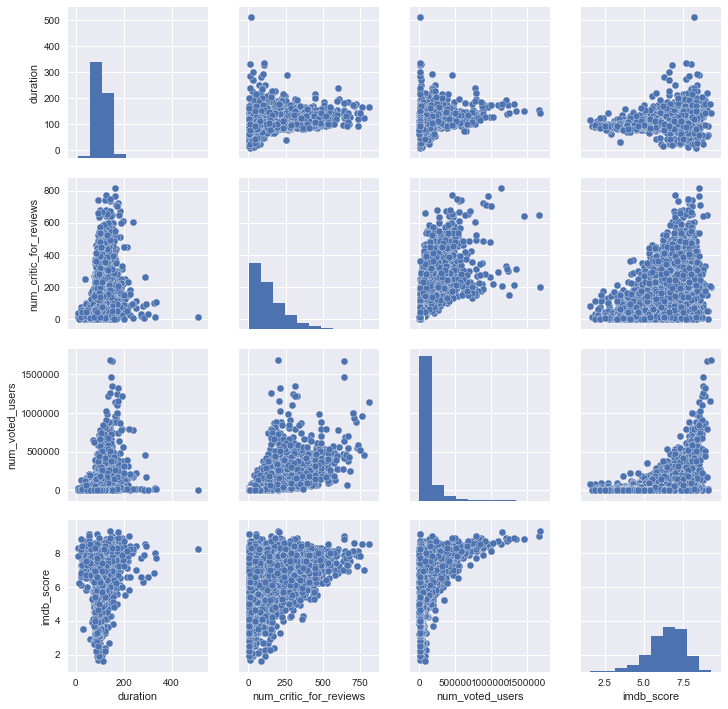

In [12]:
sns.pairplot(df[['duration', 'num_critic_for_reviews', 'num_voted_users','imdb_score']].dropna())

The sets of plots above show the patterns of the movie scores with number of critics and voted users. Intuitively, we cannot see any significant linear relationships but some other research can be conducted later to see other possibilities.


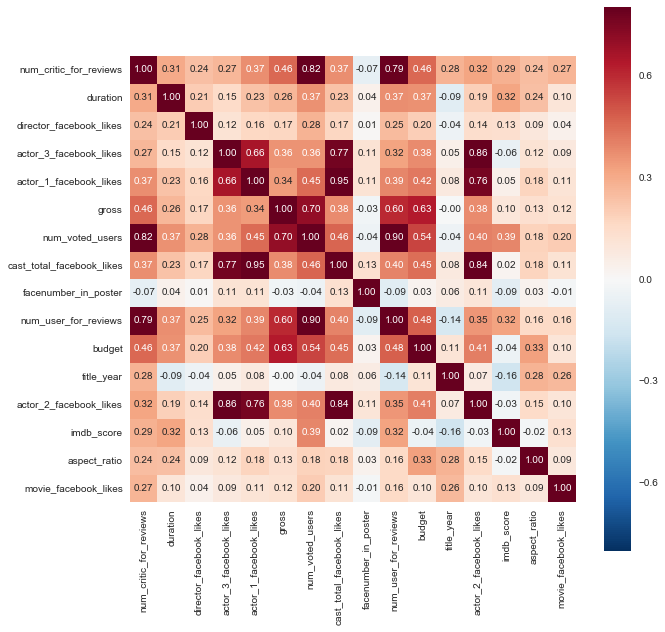

In [13]:
corrmat = df.corr(method='spearman') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

Here we use the Spearson Correlation to see if the factors are correlated, unfortunately, there isn't any strong relationship that the movie score is related to other factors. However, we do see a very strong positive relationship between the leading actor Facebook likes and the cast total Facebook likes.
It indicates that leading actors in a movie play a crucial part, people who like the actor is more likely to be a fun of the movie.


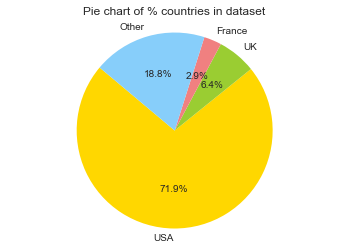

In [27]:
country_counts = Counter(df['country'])
rank_result = pd.DataFrame.from_dict(country_counts, orient='index') # counts for each country in pie chart
labels = 'USA', 'UK', 'France', 'Other'
sizes = [3807, 338, 154, 995]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of % countries in dataset')
plt.axis('equal')
plt.show()

From the pie chart above, we can see that the percentages of each country that the dataset represents. Almost 72% of the movies are from USA, 6.4% from UK, 2.9% from France and 18.8% from other countries. Thus we can say that this dataset explains the factors that affects US movie scores rather than worldwide. There would be bias if we use that to evaluate the movie scores worldwide.


<h1>Conclusion</h1>

This report is looking at the factors that affect the reviews. Through the analysis, some hypotheses are proved and we also have some new findings. We find that leading actors that attends most number of movies are not among the group with the best reviews, however, we find the best movie scores appears somewhere in the middle, the actors that has around 20 occurrences that are rated best movies. When we conduct the same analysis for the directors, we see the people that direct a lot of movies are well rated, we do find the relationship of occurrences and reviews are somehow positive. After that we look at how the number of critics and movie scores, we are surprised to see that the more the number of critics, the higher the movie scores. We also look at the relationship between the budgets and reviews. Unfortunately, we don't see these two factors are positively correlated. Finally, we analyze the movie duration and reviews, we use the linear regression model and see these two factors are positively correlated.
From the analysis, some use linear regression models. Some numbers are tested not as fit as expected to the model, thus further research should be conducted to explore other models that might be a better fit. The whole dataset is a good sample to measure the movies from USA, but be caution to use for other countries, it might not be a good fit.
